### 머신러닝 플로우
    머신러닝 단계는 크게
    데이터 분석(데이터 로더, Feature 추출, 데이터 전처리)
    ---> 모델 생성
    ---> 모델 학습
    ---> 예측
    ---> 평가(Accuracy측정)
    이렇게 크게 프로세스가 나뉜다.
    
    이 중 성능평가 단계에서 정확도 측정/오차 행렬을 살펴본다.

### Bagging 기법
    RF는 앙상블 알고리즘 중 다양한 영역에서 높은 성능을 보인다.
    RF는 Bagging 알고리즘이 적용된 모델이다.
    여러 개의 결정트리가 전체 데이터 셋에서 Bagging방식으로 각자의 데이터 셋을 샘플링해 개별적으로 학습을 수행한 뒤
    최종적으로 투표 방식(다수결의 원칙)을 통해 가장 보편적인 예측 결정을 하게 된다.
    
    Scikit-Learn은 RandomForestClassifier 클래스를 통해 랜덤포레스트 기반의 분류를 지원한다.

### sklearn IRIS DataSet Loader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
# iris

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    random_state=42,
                                                    stratify=iris.target)

### RF Model 생성

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
forest = RandomForestClassifier(n_estimators=100, # Decision Tree의 개수
                                n_jobs=-1,        # 사용할 CPU 코어 개수
                                random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Model Accuracy 측정하기
    1) 직접 일일이 확인
    2) 사용자 함수 정의해서 확인
    3) score(), accuracy_score() 라이브러리 함수 사용해서 확인

In [9]:
# 1)
y_pred = forest.predict(X_test)
print(y_pred)
print(y_test)

[0 1 1 1 0 1 1 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 2 2 2 0 0 0 0 2
 1]
[0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


In [10]:
# 2)
y_tuple = zip(y_pred, y_test) # zip type

for a, b in y_tuple:
    if a != b: print(f"unmatched : {a, b}")

unmatched : (1, 2)
unmatched : (1, 2)
unmatched : (2, 1)


In [11]:
# 3)
forest.score(X_test, y_test)

0.9210526315789473

In [12]:
# 3-1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9210526315789473

### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
label = [2, 0, 2, 2, 0, 1]
predict = [0, 0, 2, 2, 0, 2]
confusion_matrix(label, predict)

cm = pd.DataFrame(confusion_matrix(label, predict))
cm

,0,1,2
0,2,0,0
1,0,0,1
2,1,0,2


<AxesSubplot:>

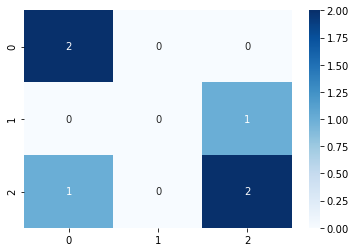

In [14]:
# Confusion Matrix는
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)